In [1]:
%matplotlib inline

import sys
sys.path.append("..") # This allows for importing from other directories above
# Our imports
from models.adaboost_mh import AdaBoostMH
from models.weak_learner import stump_base as weak_clf
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt


# Load the data
X_train = np.load('../data/synth/single/three/train_data.npy')
y_train = np.load('../data/synth/single/three/train_labels.npy')
X_test = np.load('../data/synth/single/three/test_data.npy')
y_test = np.load('../data/synth/single/three/test_labels.npy')
k = 3
  
y_train = y_train[0:15]
X_train = X_train[0:15]

In [2]:
T = 20000
verbose = 0
num_rounds = 8

In [3]:
def calc_pseudo_ws(Wts, vts, Y, T):
    w_pseudo_ts = []
    for t in range(T):
        W_t = Wts[t]
        v_t = vts[t]
        # Get all the y_i,l * v_l in one matrix
        Y_mult_v_t = np.multiply(Y, v_t)
        # The above is either 1 or -1, to get an indicator
        # about whether their product is +1 or -1 you can 
        # add one to the whole matrix and all the -1 -> 0,
        # or add negative one to the whole matrix and all
        # the +1 -> 0. You just need to normalize by \pm 1/2,
        # to get an indicator or a matrix mask.
        w_p_mask = ((Y_mult_v_t + 1) * 0.5).astype('int')
        w_n_mask = ((Y_mult_v_t - 1) * -0.5).astype('int')
        w_p_t = np.sum(np.multiply(W_t, w_p_mask), axis=1)
        w_n_t = np.sum(np.multiply(W_t, w_n_mask), axis=1)
        w_pseudo_t = np.sum(np.abs(w_p_t - w_n_t))
        w_pseudo_ts.append(w_pseudo_t)
    return w_pseudo_ts

In [4]:
mins = []
num_data_points = []
for i in range(num_rounds):
    print(i)
    model = AdaBoostMH(X_train, y_train, X_test, y_test, 0.8)
    _, _, _, v_ts, d_ts = model.run_factorized(T, weak_clf, 'unif', verbose)
    pseudo_W_ts = calc_pseudo_ws(d_ts, v_ts, y_train, T)
    mins.append(np.min(pseudo_W_ts))
    
    y_train = np.concatenate((y_train, y_train), axis=0)
    n = y_train.shape[0]
    num_data_points.append(n)
    X_train = np.atleast_2d(np.array(list(range(0,n)))).T
    #print(X_train)

0
1
2
3
4
5
6
7


## Plot Pseudo Weights

In [5]:
# Function for plotting Pseudo weights on same plot for two datasets
def make_plot(mins, num_data_points, ylabel, xlabel, title):
    plt.scatter(num_data_points, mins) #, label='Pseudo Weights')
    #plt.legend(loc='best')
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.xlabel(xlabel, fontsize=22)
    plt.ylabel(ylabel, fontsize=22)
    plt.title(title, fontsize=22)
    axes = plt.gca()
    axes.set_ylim([0,0.12])

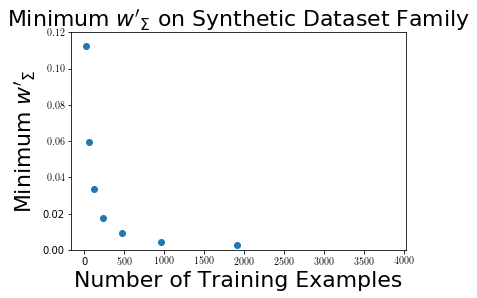

In [6]:
make_plot(mins, num_data_points, r"Minimum $w'_\Sigma$", "Number of Training Examples", r"Minimum $w'_\Sigma$ on Synthetic Dataset Family")

In [7]:
mins

[0.1122836591050339,
 0.05947666872573679,
 0.03381190005650993,
 0.017730764170532716,
 0.009173226745153461,
 0.004218067858288857,
 0.0028254712793095867,
 0.33333333333333326]